In [1]:
%matplotlib notebook
from kalman_experiments.model_selection import fit_kf_parameters
from kalman_experiments import SSPE
from kalman_experiments.kalman import PerturbedP1DMatsudaKF
from kalman_experiments.models import MatsudaParams, SingleRhythmModel, collect, gen_ar_noise_coefficients, ArNoise
import numpy as np
# Setup oscillatioins model and generate oscillatory signal
sim = SSPE.gen_sine_w_pink(1, 1000)
a = gen_ar_noise_coefficients(alpha=1.5, order=20)
kf = PerturbedP1DMatsudaKF(MatsudaParams(A=0.9, freq=1, sr=1000), q_s=2, psi=a, r_s=1)
kf = fit_kf_parameters(sim.data, kf)


 14%|██████▉                                           | 55/400 [00:11<01:09,  4.94it/s]


In [2]:
kf.psi / np.linalg.norm(kf.psi)

array([0.99012334, 0.12376542, 0.05156892, 0.02900752, 0.01885489,
       0.01335555, 0.01001666, 0.00782551, 0.00630389, 0.00520071,
       0.00437332, 0.00373555, 0.00323268, 0.0028286 , 0.0024986 ,
       0.00222531, 0.00199624, 0.00180216, 0.00163617, 0.001493  ])

In [3]:
a/np.linalg.norm(a)

array([0.99012334, 0.12376542, 0.05156892, 0.02900752, 0.01885489,
       0.01335555, 0.01001666, 0.00782551, 0.00630389, 0.00520071,
       0.00437332, 0.00373555, 0.00323268, 0.0028286 , 0.0024986 ,
       0.00222531, 0.00199624, 0.00180216, 0.00163617, 0.001493  ])

<IPython.core.display.Javascript object>


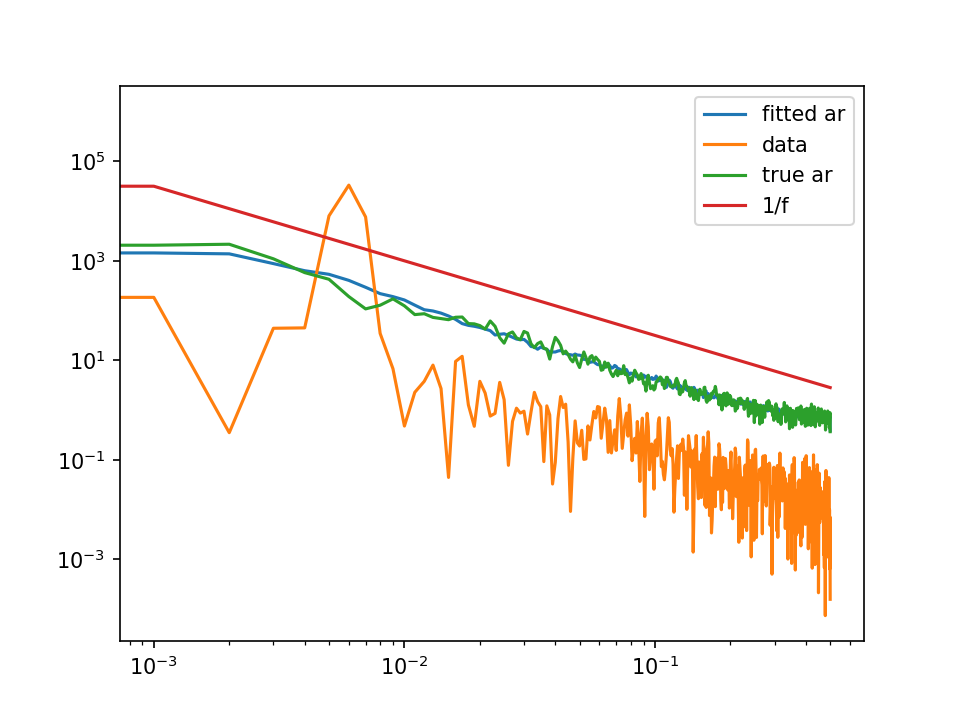

In [4]:
from collections import deque
ar_states = deque(np.random.randn(len(kf.psi)))
gen_noise = []
for i in range(100000):
    next_state = np.array(ar_states) @ kf.psi + np.random.randn()
    gen_noise.append(next_state)
    ar_states.pop()
    ar_states.appendleft(next_state)
    
from scipy.signal import welch
import matplotlib.pyplot as plt

noise_model = ArNoise(x0=np.random.rand(30), alpha=1.5, order=30, s=1)
noise_sim = collect(noise_model, 10 * 1000)
freqs, psd = welch(gen_noise, nperseg=1000)
_, psd_data = welch(sim.data, nperseg=1000)
_, psd_ar_noise = welch(noise_sim, nperseg=1000)
plt.loglog(freqs, psd, label="fitted ar")
plt.loglog(freqs, psd_data, label="data")
plt.loglog(freqs, psd_ar_noise, label="true ar")
plt.loglog(freqs, [1/f**1.5 if f else 1000000 for f in freqs ], label="1/f")
plt.legend()
plt.show()
    
    

In [5]:
kf.M

MatsudaParams(A=0.9999, freq=5.99083484099651, sr=1000)

In [6]:
kf.q_s

0.1204024926130483

In [7]:
kf.r_s

0.16078475554669946